># **Ciência dos Dados** <font color=green>- Projeto 1</font>
   #### <font color=grey> Lucas Nicascio dos Santos </font>

### Análise de indicadores de desenvolvimento social e econômico em níveis globais

&#9658; Indicadores selecionados: 
>1.  Índice de Desenvolvimento Humano (padrão);
2. Número de véiculos quatro rodas (carros, caminhões e ônibus) per capita;
3. Quantidade de pessoas com acesso à Internet

### **Pergunta:**
#### Qual o grau de influência entre si e nas tendências de crescimento e diminuição do índice de desenvolvimento humano, as emissões de CO2 por pessoa e a fertilidade total causam?

In [165]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [166]:
#ler arquivo em Excel
hdi = pd.read_excel('hdi_human_development_index.xlsx')
net = pd.read_excel('internet_users.xlsx')
cars = pd.read_excel('cars_trucks_and_buses_per_1000_persons.xlsx')

In [169]:
#verificação de qual ano possui menos valores nulos
net.isnull().sum().sort_values(ascending=True)

geo       0
2011      2
2007      3
1990      3
2014      4
2013      4
2008      4
2015      4
2016      4
2012      5
2010      5
2009      5
2002      7
2001      8
2005      9
2006     10
2004     10
2000     10
1999     12
2003     13
1998     18
1997     24
1996     34
1995     66
1994    110
1993    131
1992    145
1991    156
1989    186
1960    187
1965    187
1987    187
1976    187
1970    187
1975    187
1988    187
1977    187
1978    187
1979    187
1980    187
1982    187
1983    187
1984    187
1985    187
1986    187
1981    187
1962    194
1961    194
1969    194
1971    194
1966    194
1963    194
1964    194
1973    194
1974    194
1967    194
1972    194
1968    194
dtype: int64

In [170]:
#verificação de qual ano possui menos valores nulos
cars.isnull().sum().sort_values(ascending=True)

geo       0
2007     12
2002     77
2003     82
2004     95
2005    107
2006    120
dtype: int64

In [171]:
#verificação de qual ano possui menos valores nulos
hdi.isnull().sum().sort_values(ascending=True)

geo      0
2013     0
2012     0
2011     0
2010     0
2014     0
2015     0
2005     6
2009     6
2008     6
2007     6
2006     6
2004    15
2003    18
2002    20
2001    20
2000    20
1999    37
1995    40
1998    40
1997    40
1996    40
1993    44
1992    44
1991    44
1990    44
1994    44
dtype: int64

In [172]:
columns = hdi.columns & net.columns & cars.columns
columns

Index(['geo', 2002, 2003, 2004, 2005, 2006, 2007], dtype='object')

In [173]:
#restrição da análise à apenas um ano em cada tabela

hdi_2007 = hdi.loc[:,["geo", 2007]]
net_2007 = net.loc[:,["geo", 2007]]
cars_2007 = cars.loc[:,["geo", 2007]]

In [174]:
#Troca de índices
hdi_idx = hdi_2007.set_index('geo')

In [175]:
#Troca de índices
net_idx = net_2007.set_index('geo')

In [176]:
#Troca de índices
cars_idx =  cars_2007.set_index('geo')

In [177]:
#Renomeação da coluna da emissão de CO2
cars_idz = cars_idx.rename(index=str, columns= lambda column: str(column) + "_Carros")

In [178]:
#Agrupamento das duas primeiras variáveis
df = hdi_idx.join(net_idx, how='inner' , lsuffix= '_hdi', rsuffix= '_Internet')

In [179]:
#Agrupamento com a terceira variável
data = df.join(cars_idz, how="inner")
data.head()

,2007_hdi,2007_Internet,2007_Carros
geo,,,
Afghanistan,0.433,1.90,22.8
Albania,0.713,15.00,102.0
Algeria,0.697,9.45,NaN
Angola,0.468,1.70,39.6
Argentina,0.792,25.90,314.0


In [180]:
#Remoção dos valores "NaN"
data_final = data.dropna(how="any")
data_final.head()

,2007_hdi,2007_Internet,2007_Carros
geo,,,
Afghanistan,0.433,1.90,22.8
Albania,0.713,15.00,102.0
Angola,0.468,1.70,39.6
Argentina,0.792,25.90,314.0
Armenia,0.721,6.02,105.0


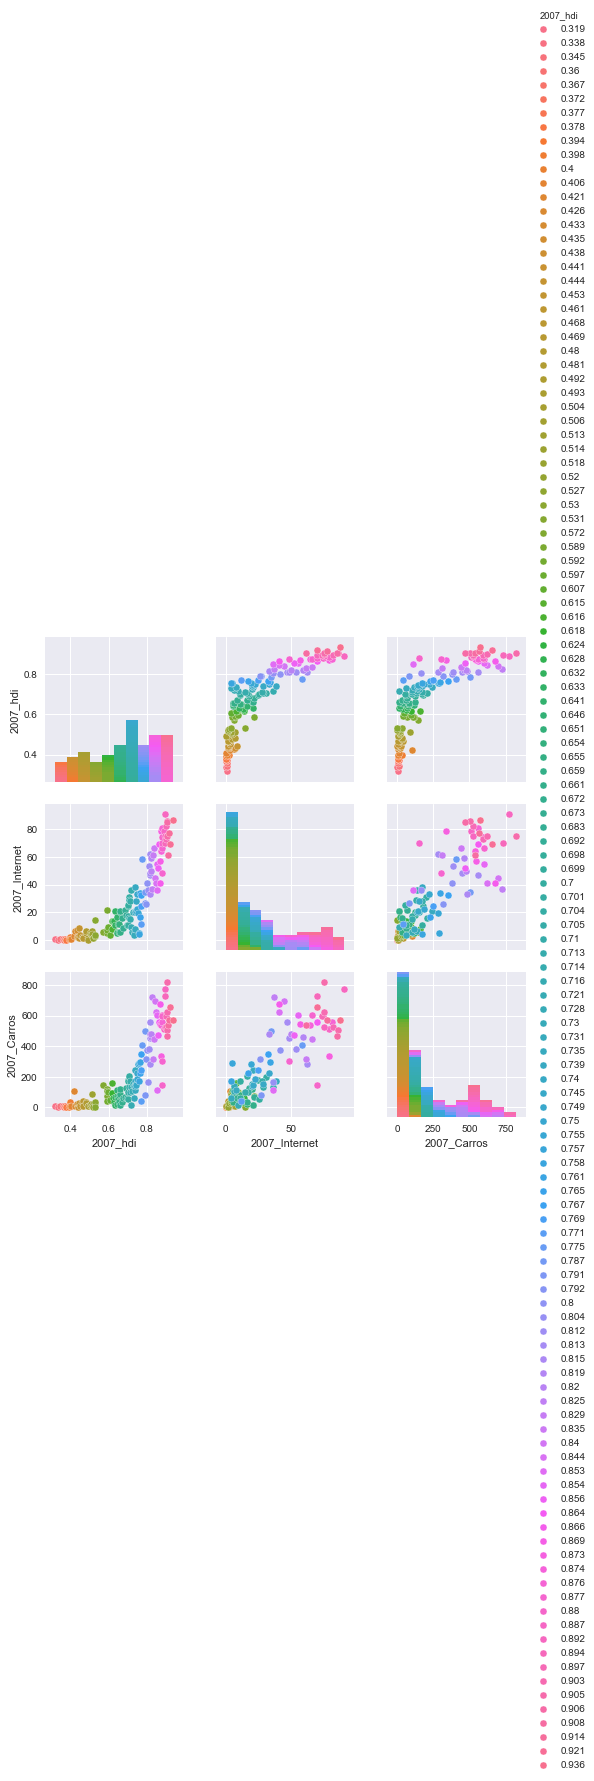

In [86]:
sns.set(style="darkgrid")

sns.pairplot(data_final,hue="2007_hdi")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

In [185]:
data_final.corr()

,2007_hdi,2007_Internet,2007_Carros
2007_hdi,1.000000,0.836818,0.806240
2007_Internet,0.836818,1.000000,0.868316
2007_Carros,0.806240,0.868316,1.000000


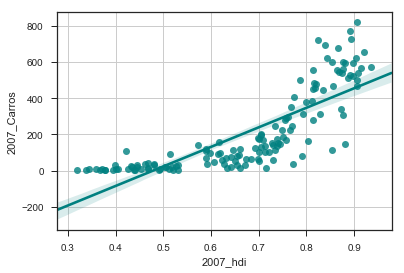

In [224]:
sns.regplot(data_final["2007_hdi"], data_final["2007_Carros"], color=('teal'))
plt.grid()

In [245]:
hdi_log = np.log(data_final["2007_hdi"])
net_log = np.log(data_final["2007_Internet"])
cars_log = np.log(data_final["2007_Carros"])

In [225]:
def reta(data_final_x, data_final_y):    
    a = data_final_y.cov(data_final_x) / data_final_x.var()
    b = data_final_y.mean() - a*data_final_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_final_x, data_final_y, c='tomato', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('HDI')
    plt.ylabel('Internet')
 
    plt.plot((data_final_x.min(), data_final_x.max()), (a*data_final_x.min()+b, a*data_final_x.max()+b), color='aqua')
 
    plt.tight_layout()
    plt.grid()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: 4.648968099834786
Coeficiente angular: 4.997763208487012


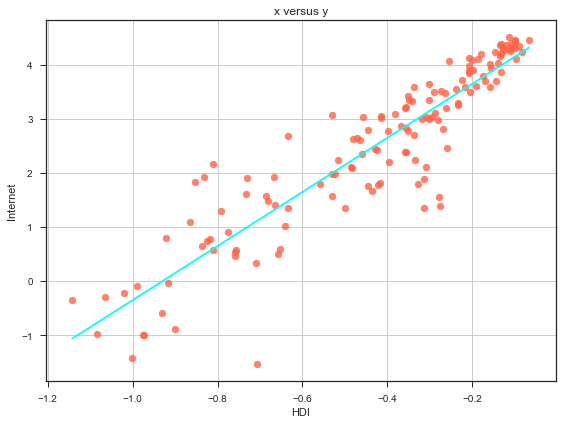

In [226]:
reta(hdi_log, net_log)

Ajuste linear entre X3 e X4:
Coeficiente linear: 6.7288011349166466
Coeficiente angular: 5.277395925888807


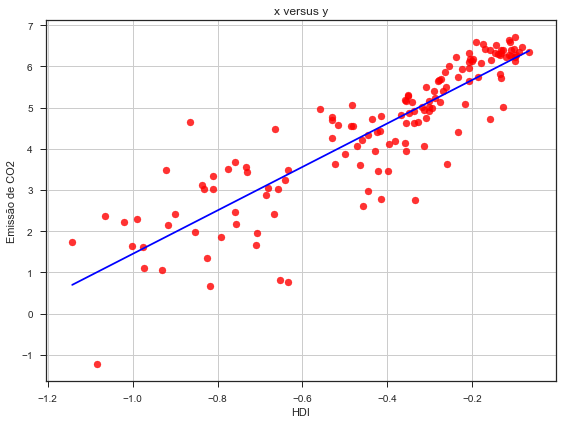

In [227]:
 def reta(data_final_x, data_final_y):    
    a = data_final_y.cov(data_final_x) / data_final_x.var()
    b = data_final_y.mean() - a*data_final_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_final_x, data_final_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('HDI')
    plt.ylabel('Emissão de CO2')
 
    plt.plot((data_final_x.min(), data_final_x.max()), (a*data_final_x.min()+b, a*data_final_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.grid()
    plt.show()
    
reta(hdi_log, cars_log)

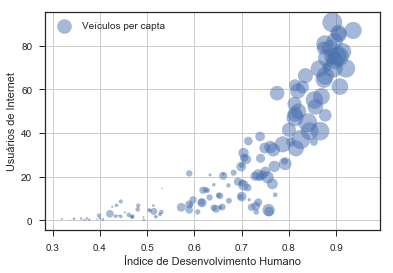

In [228]:
x = data_final["2007_hdi"]
y = data_final["2007_Internet"]
area = data_final["2007_Carros"]/data_final["2007_Carros"].max()* 400

plt.scatter(x, y, s=area, alpha=0.5, label = "Veículos per capta")
plt.xlabel("Índice de Desenvolvimento Humano")
plt.ylabel("Usuários de Internet")
plt.legend()
plt.grid()
plt.show()

In [137]:
hdi_anos = hdi.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]]
internet_anos = net.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]]
carros_anos = cars.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]]

In [212]:
#hdi_loglog = np.log(hdi.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]])
#net_loglog = np.log(net.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]])
#cars_loglog = np.log(cars.loc[:, ["geo", 2002, 2003, 2004, 2005, 2006, 2007]])

In [229]:
hdi_idw = hdi_anos.set_index('geo')
internet_idw = internet_anos.set_index('geo')
cars_idy = carros_anos.set_index('geo')
cars_idw = cars_idy.rename(index=str, columns= lambda column: str(column) + "_carros")

In [230]:
datta = hdi_idw.join(internet_idw, how='inner' , lsuffix= '_hdi', rsuffix= '_internet')

In [255]:
dframe = datta.join(cars_idw, how="inner")
dataframe = dframe.dropna(how="any")

In [256]:
log = np.log(dataframe)

In [257]:
def graph(anoI, anoF, nomeX, nomeY, data_set, titulo, label_x, label_y):
    lista = np.arange(anoI, anoF+1)
    fig = plt.figure(figsize=(16, 12))
    for d in lista:
        
        dados_x = data_set[str(d) + nomeX]
        dados_y = data_set[str(d) + nomeY]
       
        a = dados_y.cov(dados_x) / dados_x.var()
        b = dados_y.mean() - a*dados_x.mean()
 
        plt.scatter(dados_x, dados_y, alpha=0.8)
        plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b))
    
    plt.tight_layout()
    plt.title(titulo)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend()
    plt.grid()
    plt.show()

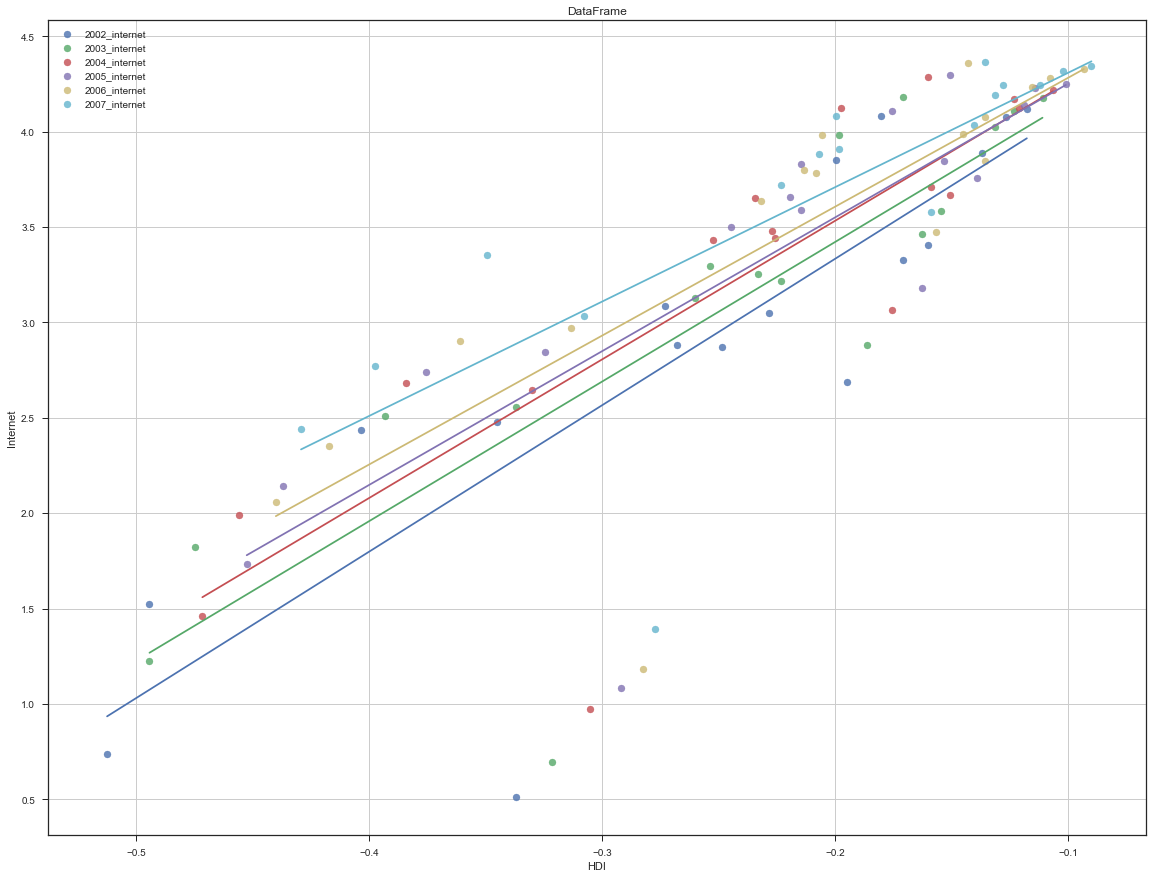

In [258]:
graph(2002, 2007,"_hdi", "_internet", log, "DataFrame", "HDI", "Internet")

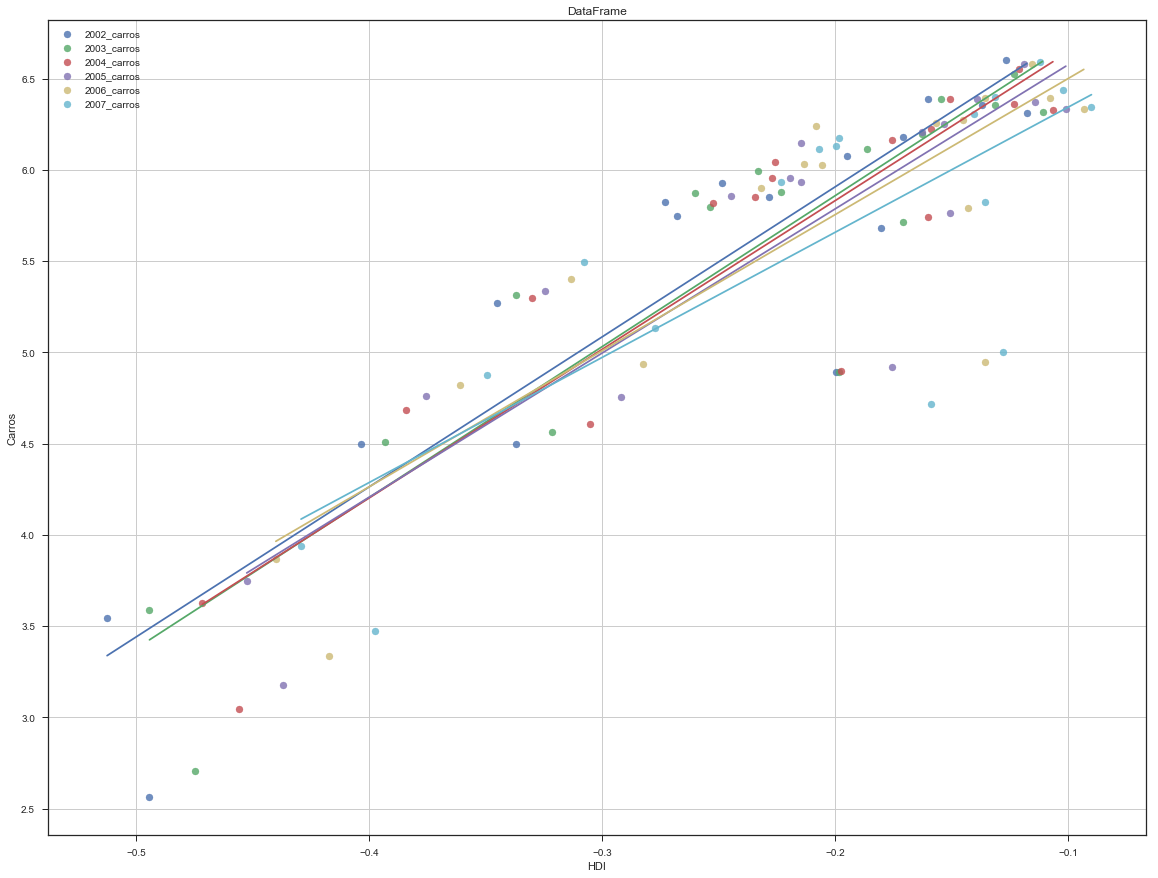

In [259]:
graph(2002, 2007,"_hdi", "_carros", log, "DataFrame", "HDI", "Carros")

In [261]:
dataframe.to_excel("Projeto_1.xlsx")
dataframe.to_csv("Projeto_1.csv")